In [33]:
# Read in the consolidated data
import pandas as pd

RES_consolidated = pd.read_excel('/Users/MattJohnson/Library/CloudStorage/OneDrive-UniversityofCapeTown/Masters_thesis/Data checks/Consolidation/Finalized/RES_aff_ref_output_1940_2010_affs_out authors Finalized.xlsx', 'Final RES')

In [34]:
# This is taking a dataframe with multiple affilitaion columns and melting these to be all one column.
melted = RES_consolidated.melt(id_vars= ['Article_ID','year'], value_vars=['0_author_affs_consolidated_0','0_author_affs_consolidated_1','0_author_affs_consolidated_2','1_author_affs_consolidated_0','1_author_affs_consolidated_1','2_author_affs_consolidated_0','2_author_affs_consolidated_1','2_author_affs_consolidated_2','3_author_affs_consolidated_0']).dropna()
melted.rename(columns = {'variable':'Aff number'}, inplace = True)
melted.rename(columns = {'value':'Affiliation'}, inplace = True)
melted = melted.sort_values(by = ['year'])
print(melted.head())
print(melted.shape)

      Article_ID  year                    Aff number  \
0        2967419  1940  0_author_affs_consolidated_0   
6367     2967476  1940  1_author_affs_consolidated_0   
19       2967476  1940  0_author_affs_consolidated_0   
18       2967475  1940  0_author_affs_consolidated_0   
17       2967474  1940  0_author_affs_consolidated_0   

                                       Affiliation  
0            Chicago Illinois United States (City)  
6367                  London United Kingdom (City)  
19                                             Ucb  
18    Cambridge Massachusetts United States (City)  
17              Columbus Ohio United States (CIty)  
(3060, 4)


In [35]:
(melted.loc[(melted['Affiliation'] != 'National Bureau Of Economic Research')]).shape
melted = melted.loc[(melted['Affiliation'] != 'National Bureau Of Economic Research')]
melted = melted.loc[(melted['Affiliation'] != 'Cepr')]
base = melted

In [36]:
# Counting the number of times a certain affiliton occurs
melted['aff_cum_counts'] = melted.groupby(['Affiliation']).cumcount()+1
melted.head()
#melted.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/JPE/Test files/JPE_melted_master_aff_count.xlsx') 

,Article_ID,year,Aff number,Affiliation,aff_cum_counts
0,2967419,1940,0_author_affs_consolidated_0,Chicago Illinois United States (City),1
6367,2967476,1940,1_author_affs_consolidated_0,London United Kingdom (City),1
19,2967476,1940,0_author_affs_consolidated_0,Ucb,1
18,2967475,1940,0_author_affs_consolidated_0,Cambridge Massachusetts United States (City),1
17,2967474,1940,0_author_affs_consolidated_0,Columbus Ohio United States (CIty),1


In [37]:
# Checking the top 20 occurances of Universities over the 70 years
highest_vals = melted.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

highest_vals_10 = highest_vals_10[['Article_ID' ,'Aff number', 'Affiliation', 'year','aff_cum_counts']]
highest_vals_10

,Article_ID,Aff number,Affiliation,year,aff_cum_counts
2024,40247628,0_author_affs_consolidated_0,Northwestern University,2009,85
8430,40587625,1_author_affs_consolidated_0,University Of Oxford,2010,80
8455,40835853,1_author_affs_consolidated_0,London School Of Economics,2010,73
512,2295941,0_author_affs_consolidated_0,Cambridge Massachusetts United States (City),1964,69
2112,40835858,0_author_affs_consolidated_0,Harvard University,2010,68
2075,40587629,0_author_affs_consolidated_0,Massachusetts Institute Of Technology,2010,64
8460,40835858,1_author_affs_consolidated_0,Princeton University,2010,60
2085,40587628,0_author_affs_consolidated_0,Stanford University,2010,59
8436,40587635,1_author_affs_consolidated_0,University Of Pennsylvania,2010,58
497,2295897,0_author_affs_consolidated_0,London United Kingdom (City),1964,54


      Article_ID  year                    Aff number  \
0        2967419  1940  0_author_affs_consolidated_0   
6367     2967476  1940  1_author_affs_consolidated_0   
19       2967476  1940  0_author_affs_consolidated_0   
18       2967475  1940  0_author_affs_consolidated_0   
17       2967474  1940  0_author_affs_consolidated_0   

                                       Affiliation  aff_cum_counts  
0            Chicago Illinois United States (City)               1  
6367                  London United Kingdom (City)               1  
19                                             Ucb               1  
18    Cambridge Massachusetts United States (City)               1  
17              Columbus Ohio United States (CIty)               1  


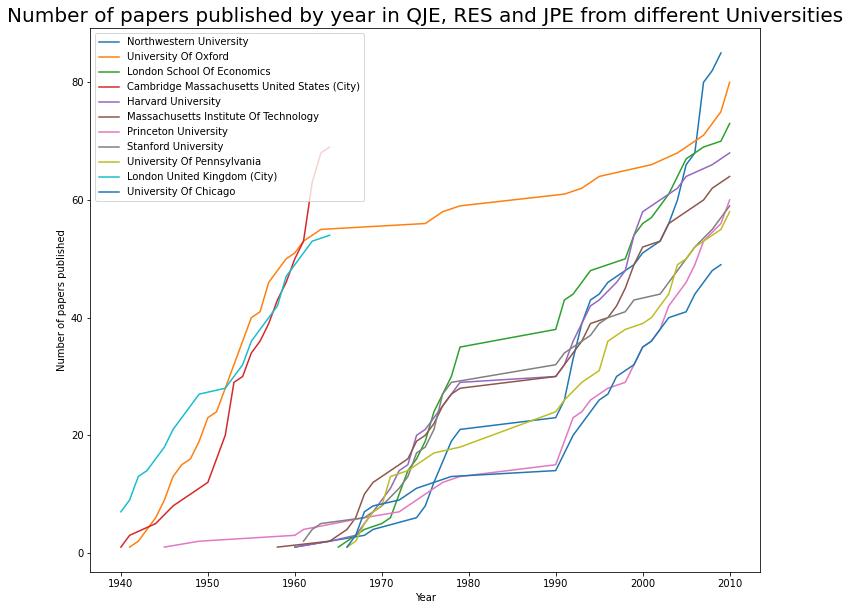

In [38]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Combined_cumcount = melted
print(Combined_cumcount.head())

a = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[0,2])].drop_duplicates(subset = ['year'], keep = 'last')
b = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[1,2])].drop_duplicates(subset = ['year'], keep = 'last')
c = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[2,2])].drop_duplicates(subset = ['year'], keep = 'last')
d = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[3,2])].drop_duplicates(subset = ['year'], keep = 'last')
e = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[4,2])].drop_duplicates(subset = ['year'], keep = 'last')
f = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[5,2])].drop_duplicates(subset = ['year'], keep = 'last')
g = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[6,2])].drop_duplicates(subset = ['year'], keep = 'last')
h = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[7,2])].drop_duplicates(subset = ['year'], keep = 'last')
i = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[8,2])].drop_duplicates(subset = ['year'], keep = 'last')
j = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[9,2])].drop_duplicates(subset = ['year'], keep = 'last')
k = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[10,2])].drop_duplicates(subset = ['year'], keep = 'last')
plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in QJE, RES and JPE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()

# Doing indivdual year group plots

In [39]:
base.shape
base.head()

,Article_ID,year,Aff number,Affiliation,aff_cum_counts
0,2967419,1940,0_author_affs_consolidated_0,Chicago Illinois United States (City),1
6367,2967476,1940,1_author_affs_consolidated_0,London United Kingdom (City),1
19,2967476,1940,0_author_affs_consolidated_0,Ucb,1
18,2967475,1940,0_author_affs_consolidated_0,Cambridge Massachusetts United States (City),1
17,2967474,1940,0_author_affs_consolidated_0,Columbus Ohio United States (CIty),1


   Article_ID  year                    Aff number  \
0     2967419  1940  0_author_affs_consolidated_0   
1     2967476  1940  1_author_affs_consolidated_0   
2     2967476  1940  0_author_affs_consolidated_0   
3     2967475  1940  0_author_affs_consolidated_0   
4     2967474  1940  0_author_affs_consolidated_0   

                                    Affiliation  aff_cum_counts  
0         Chicago Illinois United States (City)               1  
1                  London United Kingdom (City)               1  
2                                           Ucb               1  
3  Cambridge Massachusetts United States (City)               1  
4            Columbus Ohio United States (CIty)               1  


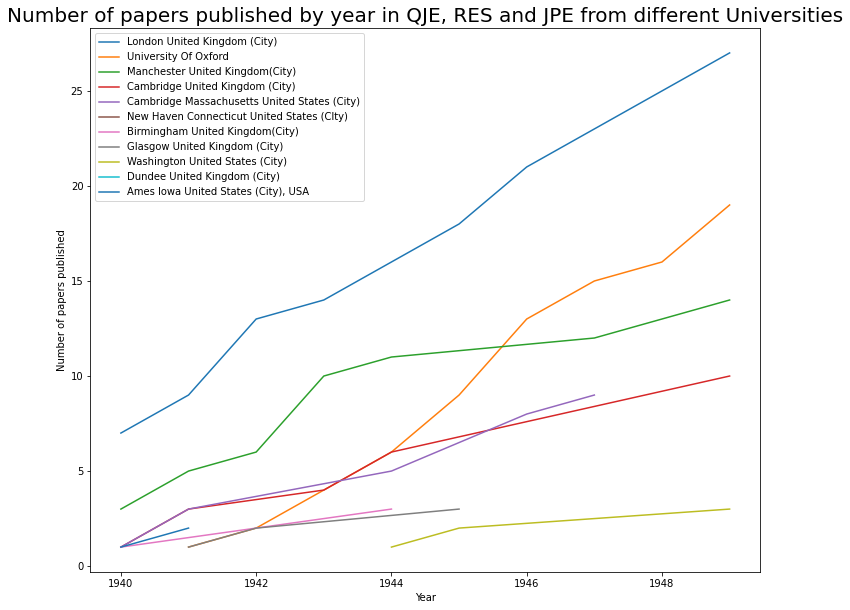

In [40]:
mask_year = base['year'].isin([1940,1941,1942,1943,1944,1945,1946,1947,1948,1949])
base_1940 = base[mask_year]
base_1940 = base_1940.reset_index(drop = True)
base_1940 = base_1940[['Article_ID', 'year' ,'Aff number', 'Affiliation']]

# Counting the number of times a certain affiliton occurs
base_1940['aff_cum_counts'] = base_1940.groupby(['Affiliation']).cumcount()+1
base_1940.head()
#melted.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/JPE/Test files/JPE_melted_master_aff_count.xlsx') 

# Checking the top 20 occurances of Universities over the 70 years
highest_vals = base_1940.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

highest_vals_10 = highest_vals_10[['Article_ID' ,'Aff number', 'Affiliation', 'year','aff_cum_counts']]
highest_vals_10

#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Combined_cumcount = base_1940
print(Combined_cumcount.head())

a = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[0,2])].drop_duplicates(subset = ['year'], keep = 'last')
b = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[1,2])].drop_duplicates(subset = ['year'], keep = 'last')
c = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[2,2])].drop_duplicates(subset = ['year'], keep = 'last')
d = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[3,2])].drop_duplicates(subset = ['year'], keep = 'last')
e = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[4,2])].drop_duplicates(subset = ['year'], keep = 'last')
f = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[5,2])].drop_duplicates(subset = ['year'], keep = 'last')
g = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[6,2])].drop_duplicates(subset = ['year'], keep = 'last')
h = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[7,2])].drop_duplicates(subset = ['year'], keep = 'last')
i = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[8,2])].drop_duplicates(subset = ['year'], keep = 'last')
j = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[9,2])].drop_duplicates(subset = ['year'], keep = 'last')
k = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[10,2])].drop_duplicates(subset = ['year'], keep = 'last')

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in QJE, RES and JPE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()

   Article_ID  year                    Aff number                 Affiliation  \
0     2566981  2000  1_author_affs_consolidated_0    Brigham Young University   
1     2566985  2000  1_author_affs_consolidated_0           Boston University   
2     2566986  2000  1_author_affs_consolidated_0  University Of Pennsylvania   
3     2567029  2000  1_author_affs_consolidated_0       University Of Chicago   
4     2567027  2000  1_author_affs_consolidated_0   University Of Southampton   

   aff_cum_counts  
0               1  
1               1  
2               1  
3               1  
4               1  


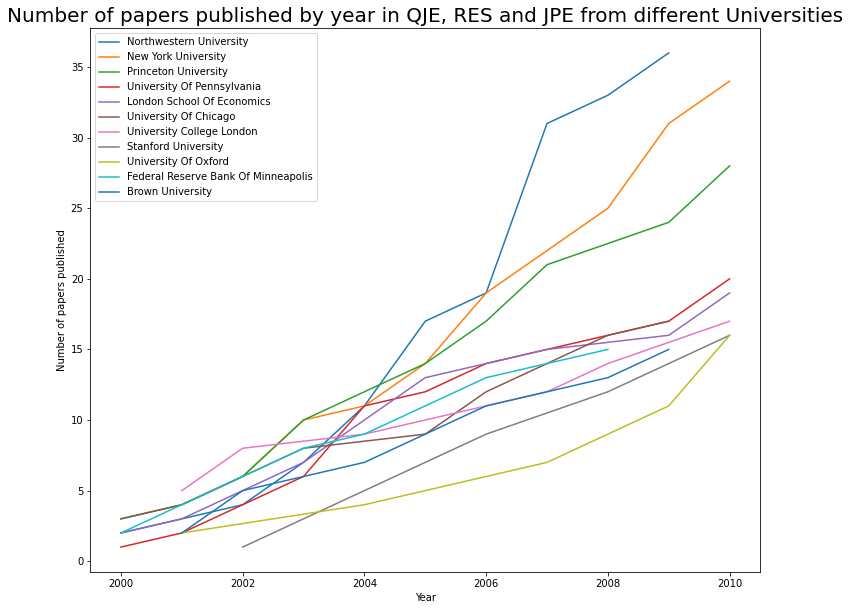

In [41]:
mask_year = base['year'].isin([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010])
base_1940 = base[mask_year]
base_1940 = base_1940.reset_index(drop = True)
base_1940 = base_1940[['Article_ID', 'year' ,'Aff number', 'Affiliation']]

# Counting the number of times a certain affiliton occurs
base_1940['aff_cum_counts'] = base_1940.groupby(['Affiliation']).cumcount()+1
base_1940.head()
#melted.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/JPE/Test files/JPE_melted_master_aff_count.xlsx') 

# Checking the top 20 occurances of Universities over the 70 years
highest_vals = base_1940.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

highest_vals_10 = highest_vals_10[['Article_ID' ,'Aff number', 'Affiliation', 'year','aff_cum_counts']]
highest_vals_10

#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Combined_cumcount = base_1940
print(Combined_cumcount.head())

a = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[0,2])].drop_duplicates(subset = ['year'], keep = 'last')
b = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[1,2])].drop_duplicates(subset = ['year'], keep = 'last')
c = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[2,2])].drop_duplicates(subset = ['year'], keep = 'last')
d = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[3,2])].drop_duplicates(subset = ['year'], keep = 'last')
e = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[4,2])].drop_duplicates(subset = ['year'], keep = 'last')
f = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[5,2])].drop_duplicates(subset = ['year'], keep = 'last')
g = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[6,2])].drop_duplicates(subset = ['year'], keep = 'last')
h = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[7,2])].drop_duplicates(subset = ['year'], keep = 'last')
i = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[8,2])].drop_duplicates(subset = ['year'], keep = 'last')
j = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[9,2])].drop_duplicates(subset = ['year'], keep = 'last')
k = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[10,2])].drop_duplicates(subset = ['year'], keep = 'last')

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in QJE, RES and JPE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()